<a href="https://colab.research.google.com/github/negrete-93/M-todo-de-Jacobi/blob/main/Metodo_de_Jacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convergió en 1041 iteraciones.
Error máximo: 1.990679e+00


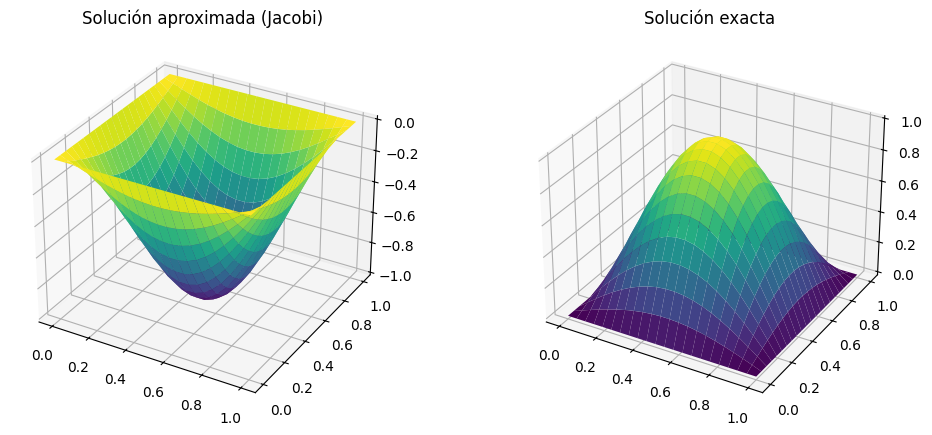

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return -2 * (np.pi**2) * np.sin(np.pi*x) * np.sin(np.pi*y)

# Parámetros
n = 20
Nmax = 5000
tol = 1e-6
h = 1/(n+1)

#Malla
x = np.linspace(0, 1, n+2)
y = np.linspace(0, 1, n+2)
X, Y = np.meshgrid(x, y)

# CI
u = np.zeros((n+2, n+2))
fxy = f(X, Y)

# Método de Jacobi
for k in range(1, Nmax+1):
    u_new = np.copy(u)
    for i in range(1, n+1):
        for j in range(1, n+1):
            u_new[i,j] = 0.25 * (h**2 * fxy[i,j] +
                                u[i+1,j] + u[i-1,j] +
                                u[i,j+1] + u[i,j-1])

    if np.linalg.norm(u_new - u) < tol:
        print(f"Convergió en {k} iteraciones.")
        break
    u = u_new

# Solución exacta
u_exact = np.sin(np.pi*X) * np.sin(np.pi*Y)

# Error
error = np.max(np.abs(u - u_exact))
print(f"Error máximo: {error:.6e}")

# Gráfica
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, u, cmap='viridis')
ax1.set_title("Solución aproximada (Jacobi)")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, u_exact, cmap='viridis')
ax2.set_title("Solución exacta")

plt.show()
